<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-719.574925,-600.133762,-218.376937,-381.756825
1,0.0,1.0,57.329540,67.934475,6821.138711,6956.402726,2763.790381,4192.612345
2,0.0,2.0,45.215694,51.000161,1157.956635,1264.172489,1605.638450,-341.465960
3,0.0,3.0,69.375325,41.455180,-3088.435511,-2967.605007,-155.382834,-2812.222173
4,0.0,4.0,87.837297,72.508079,1851.679123,2022.024500,2102.519106,-80.494606
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,80.796309,77.053430,-41.198357,126.651383,-796.880312,923.531694
19996,999.0,16.0,55.693260,82.026896,-2335.854207,-2188.134051,-1508.773948,-679.360103
19997,999.0,17.0,31.807331,54.350001,2198.991614,2295.148945,-1015.320579,3310.469524
19998,999.0,18.0,61.402559,56.564504,1998.125776,2126.092840,-467.862407,2593.955246


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    68.854520  40.586643   -719.574925   -600.133762  -218.376937   
      1.0    57.329540  67.934475   6821.138711   6956.402726  2763.790381   
      2.0    45.215694  51.000161   1157.956635   1264.172489  1605.638450   
      3.0    69.375325  41.455180  -3088.435511  -2967.605007  -155.382834   
      4.0    87.837297  72.508079   1851.679123   2022.024500  2102.519106   
...                ...        ...           ...           ...          ...   
999.0 15.0   80.796309  77.053430    -41.198357    126.651383  -796.880312   
      16.0   55.693260  82.026896  -2335.854207  -2188.134051 -1508.773948   
      17.0   31.807331  54.350001   2198.991614   2295.148945 -1015.320579   
      18.0   61.402559  56.564504   1998.125776   2126.092840  -467.862407   
      19.0   59.355529  90.334689 -15091.374654 -14931.684436 -1731.259980   

                    e_hat  
rep   index                
0.0   0.0     -381.756825  
      1.0     4192.612345  
      2.0     -341.465960  
      3.0    -2812.222173  
      4.0      -80.494606  
...                   ...  
999.0 15.0     923.531694  
      16.0    -679.360103  
      17.0    3310.469524  
      18.0    2593.955246  
      19.0  -13200.424456  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    68.854520  40.586643   -719.574925   -600.133762  -218.376937   
      1.0    57.329540  67.934475   6821.138711   6956.402726  2763.790381   
      2.0    45.215694  51.000161   1157.956635   1264.172489  1605.638450   
      3.0    69.375325  41.455180  -3088.435511  -2967.605007  -155.382834   
      4.0    87.837297  72.508079   1851.679123   2022.024500  2102.519106   
...                ...        ...           ...           ...          ...   
999.0 15.0   80.796309  77.053430    -41.198357    126.651383  -796.880312   
      16.0   55.693260  82.026896  -2335.854207  -2188.134051 -1508.773948   
      17.0   31.807331  54.350001   2198.991614   2295.148945 -1015.320579   
      18.0   61.402559  56.564504   1998.125776   2126.092840  -467.862407   
      19.0   59.355529  90.334689 -15091.374654 -14931.684436 -1731.259980   

                    e_hat  
rep   index                
0.0   0.0     -381.756825  
      1.0     4192.612345  
      2.0     -341.465960  
      3.0    -2812.222173  
      4.0      -80.494606  
...                   ...  
999.0 15.0     923.531694  
      16.0    -679.360103  
      17.0    3310.469524  
      18.0    2593.955246  
      19.0  -13200.424456  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-719.574925,-600.133762,-218.376937,-381.756825
1,0.0,1.0,57.329540,67.934475,6821.138711,6956.402726,2763.790381,4192.612345
2,0.0,2.0,45.215694,51.000161,1157.956635,1264.172489,1605.638450,-341.465960
3,0.0,3.0,69.375325,41.455180,-3088.435511,-2967.605007,-155.382834,-2812.222173
4,0.0,4.0,87.837297,72.508079,1851.679123,2022.024500,2102.519106,-80.494606
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,80.796309,77.053430,-41.198357,126.651383,-796.880312,923.531694
19996,999.0,16.0,55.693260,82.026896,-2335.854207,-2188.134051,-1508.773948,-679.360103
19997,999.0,17.0,31.807331,54.350001,2198.991614,2295.148945,-1015.320579,3310.469524
19998,999.0,18.0,61.402559,56.564504,1998.125776,2126.092840,-467.862407,2593.955246


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    68.854520  40.586643   -719.574925   -600.133762  -218.376937   
      1.0    57.329540  67.934475   6821.138711   6956.402726  2763.790381   
      2.0    45.215694  51.000161   1157.956635   1264.172489  1605.638450   
      3.0    69.375325  41.455180  -3088.435511  -2967.605007  -155.382834   
      4.0    87.837297  72.508079   1851.679123   2022.024500  2102.519106   
...                ...        ...           ...           ...          ...   
999.0 15.0   80.796309  77.053430    -41.198357    126.651383  -796.880312   
      16.0   55.693260  82.026896  -2335.854207  -2188.134051 -1508.773948   
      17.0   31.807331  54.350001   2198.991614   2295.148945 -1015.320579   
      18.0   61.402559  56.564504   1998.125776   2126.092840  -467.862407   
      19.0   59.355529  90.334689 -15091.374654 -14931.684436 -1731.259980   

                    e_hat  
rep   index                
0.0   0.0     -381.756825  
      1.0     4192.612345  
      2.0     -341.465960  
      3.0    -2812.222173  
      4.0      -80.494606  
...                   ...  
999.0 15.0     923.531694  
      16.0    -679.360103  
      17.0    3310.469524  
      18.0    2593.955246  
      19.0  -13200.424456  

[20000 rows x 6 columns]

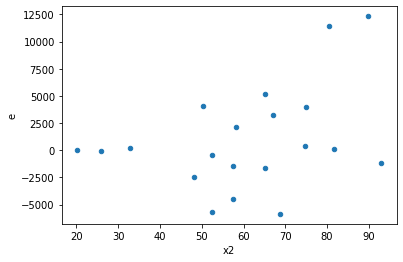

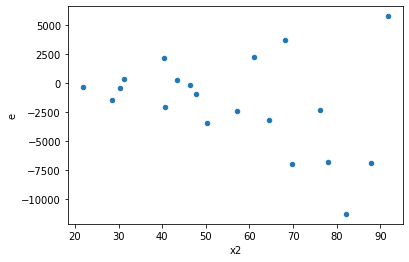

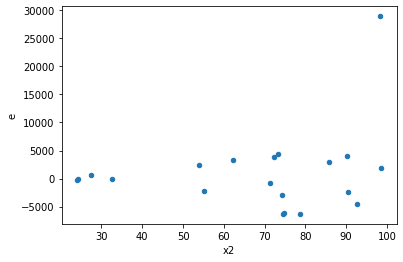

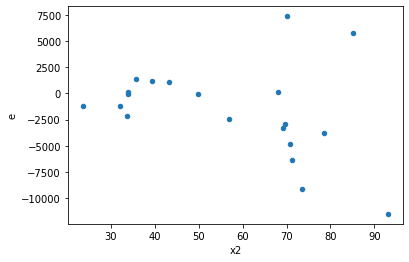

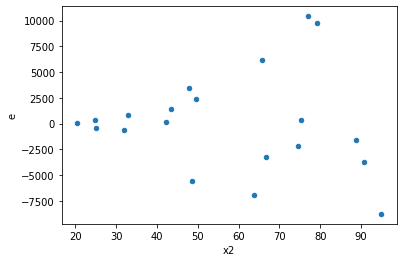

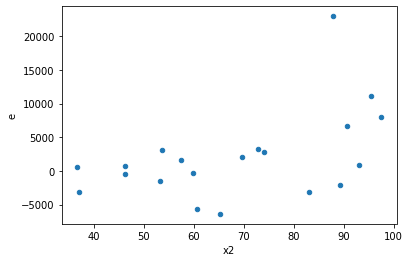

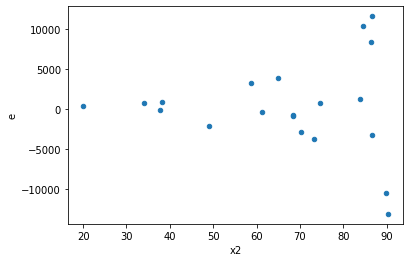

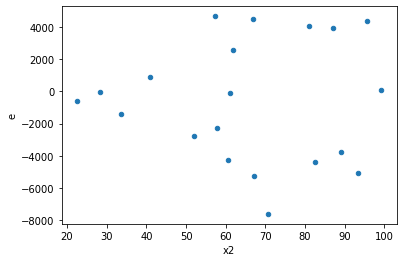

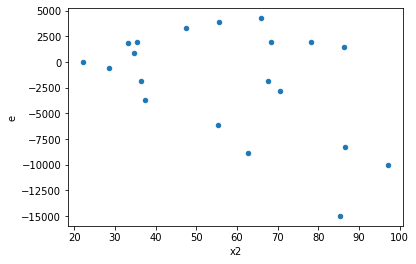

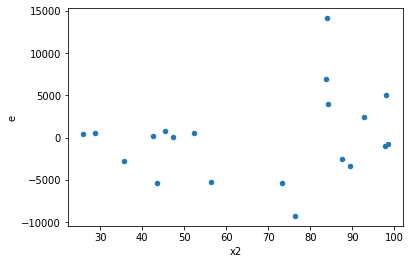

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,5.0,11.0,9359362.336544497,169290798.21116868,1871872.4673088994,15390072.564651698,8.221752728046297,0.003777953820537361,0.9981110230897313,0.0018889769102686804,Reject005=0 : Heteroscedasticity
3.0,4.0,12.0,34283157.887037076,401824233.67999095,8570789.471759269,33485352.806665912,3.9069158001138717,0.05900710981942425,0.9704964450902879,0.029503554909712126,Reject005=1 : Homoscedasticity
4.0,9.0,7.0,96786306.72899935,1022705340.8361328,10754034.080999928,146100762.9765904,13.58567044479793,0.002368901469334217,0.9988155492653329,0.0011844507346671085,Reject005=0 : Heteroscedasticity
5.0,6.0,10.0,22600458.23123064,310938133.4656553,3766743.0385384397,31093813.346565533,8.254827321226154,0.004158583812753802,0.9979207080936231,0.002079291906376901,Reject005=0 : Heteroscedasticity
6.0,9.0,7.0,14196710.838924542,443507510.731392,1577412.3154360603,63358215.81877029,40.16591933432162,6.682024862736391e-05,0.9999665898756863,3.3410124313681955e-05,Reject005=0 : Heteroscedasticity
7.0,9.0,7.0,120466477.15895702,160833748.9501757,13385164.128773002,22976249.8500251,1.716545992935187,0.4886296036143958,0.7556851981928021,0.2443148018071979,Reject005=1 : Homoscedasticity
8.0,12.0,4.0,231480698.18013757,190461119.57718468,19290058.18167813,47615279.89429617,2.4683844623922173,0.39700291878285165,0.8014985406085742,0.19850145939142583,Reject005=1 : Homoscedasticity
9.0,12.0,4.0,105060414.54409766,114011423.62593193,8755034.545341471,28502855.906482983,3.255596052633427,0.2646491077868749,0.8676754461065626,0.13232455389343745,Reject005=1 : Homoscedasticity
12.0,5.0,11.0,17273788.846453913,786845871.7649639,3454757.7692907825,71531442.88772398,20.705197777848394,5.876300543183888e-05,0.9999706184972841,2.938150271591944e-05,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,147252975.46316877,14219926.978682857,18406621.932896096,1777490.8723353571,0.09656801116551683,0.0033839119164291403,Reject005=0 : Heteroscedasticity
1.0,5.0,11.0,31214177.81548047,57236238.7384734,6242835.563096094,5203294.430770309,0.8334825382121339,0.8954689680644393,Reject005=1 : Homoscedasticity
2.0,5.0,11.0,9359362.336544497,169290798.21116868,1871872.4673088994,15390072.564651698,8.221752728046297,0.003777953820537361,Reject005=0 : Heteroscedasticity
3.0,4.0,12.0,34283157.887037076,401824233.67999095,8570789.471759269,33485352.806665912,3.9069158001138717,0.05900710981942425,Reject005=1 : Homoscedasticity
4.0,9.0,7.0,96786306.72899935,1022705340.8361328,10754034.080999928,146100762.9765904,13.58567044479793,0.002368901469334217,Reject005=0 : Heteroscedasticity
5.0,6.0,10.0,22600458.23123064,310938133.4656553,3766743.0385384397,31093813.346565533,8.254827321226154,0.004158583812753802,Reject005=0 : Heteroscedasticity
6.0,9.0,7.0,14196710.838924542,443507510.731392,1577412.3154360603,63358215.81877029,40.16591933432162,6.682024862736391e-05,Reject005=0 : Heteroscedasticity
7.0,9.0,7.0,120466477.15895702,160833748.9501757,13385164.128773002,22976249.8500251,1.716545992935187,0.4886296036143958,Reject005=1 : Homoscedasticity
8.0,12.0,4.0,231480698.18013757,190461119.57718468,19290058.18167813,47615279.89429617,2.4683844623922173,0.39700291878285165,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    567
Reject005=1 : Homoscedasticity      433
Name: Result_test, dtype: int64